### Monte Carlo - Distribution of t-statistic

$$
\begin{align}

Theory: & \quad t = \frac{\bar{x} - E(x)}{s / \sqrt{n}} \sim N(0,1) \\

\end{align}
$$

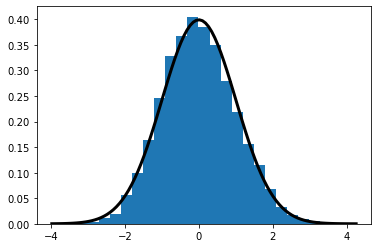

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

n = 50
k = 4 
var = 2*k
ts = []

# Repeat 10000 times
for i in range(10000):
    # Draw 50 Samples from a chi-squared distribtion with 4 degrees of freedom
    x = np.random.chisquare(k, 50)
    # Compute the sample average of those 50 samples
    xbar = np.average(x)
    # Compute test statistic as (xbar - E(X))/(sqrt(var)/n)
    t = (xbar - k)/(np.sqrt(var)/(np.sqrt(n)))
    ts.append(t)


# Plot histogram of computed t's
plt.hist(ts, 25, density=True)
# Compare with plot of N(1, 0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=3)


### Monte Carlo - Confidence Interval for $\bar{X} - 4\bar{Y}$

$$
\begin{align}



P((\bar{X} - 4\bar{Y}) - 1.96 \times SE(\bar{X} - 4\bar{Y}) < \mu_x - 4\mu_y < (\bar{X} - 4\bar{Y}) + 1.96 \times SE(\bar{X} - 4\bar{Y})) = .95 \\


\end{align}
$$

In [2]:
xbar = 10
ybar = 15
n1 = 50
n2 = 50
s1 = 2
s2 = 3

point_estimate = xbar - 4 * ybar
se = np.sqrt(((s1**2) / n1) + (((4 * s2)**2) / n2))
z =  1.96
lower_bound = point_estimate - z * se
upper_bound = point_estimate + z * se

counter = 0

# 10,000 iterations
for _ in range(10000):
    
    # Draw samples of X from N(xbar, s1) and samples of Y from N(ybar, s2)
    x_samples = np.random.normal(xbar, s1, n1)
    y_samples = np.random.normal(ybar, s2, n2)

    # Compute the sample means of X and Y
    xbar_sample = np.mean(x_samples)
    ybar_sample = np.mean(y_samples)

    # Calculate the sample difference xbar - 4 * ybar
    difference = xbar_sample - 4 * ybar_sample

    # Check if mean difference falls inside the interval
    if lower_bound <= difference <= upper_bound:
        counter += 1

# Calculate the ratio of differences within the confidence interval
ratio = counter / 10000

# Compare with theoretical 95% confidence level
print("Theoretical: 95%")
print(f"Numerical: {ratio*100}%")

Theoretical: 95%
Numerical: 94.96%


### Monte Carlo - Expectation of $\hat{\beta}_0$

$$
\begin{align}

 Theory: & \quad E\left(\hat{\beta}_0\right) = \beta_0 \\

\end{align}
$$

In [3]:
import pandas as pd
xs = pd.read_csv('econdata.csv')
b = []

# Repeat 10000 times
for _ in range(10000):
    x = []
    y = []
    for xi in xs.x:
        # Set Beta 0 = 1, Beta 1 = 2
        b0 = 1
        b1 = 2
        # Generate samples of ui, where ui ~N(0,1)
        ui = int(np.random.normal(0, 1, 1)[0])
        # Calculate yi for each x
        yi = b0 + b1*xi + ui
        x.append(xi)
        y.append(yi)
    # Regress y on x, store Beta 0
    beta1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
    beta0 = np.mean(y) - beta1 * np.mean(x)
    b.append(beta0)
# Compute average of [Beta 0_1,...Beta 0_10000]
average = np.average(b)

# Compare average of [Beta 0_1,...Beta 0_10000] to 1
print(f'Theoretical: 1 \nNumerical: {average}')

Theoretical: 1 
Numerical: 0.9985113260596243


### Regression

In [4]:
import pandas as pd
import statsmodels.formula.api as smf
data = pd.read_csv('bwght_mod.csv')
results = smf.ols('bwght ~ faminc + parity + male + cigs', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     14.07
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           3.20e-11
Time:                        19:17:33   Log-Likelihood:                -5242.3
No. Observations:                1192   AIC:                         1.049e+04
Df Residuals:                    1187   BIC:                         1.052e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.1683      1.782     63.508      0.0

#### Interpretation of constants

$$
\begin{alignat*}{2}

& \beta_{1} = 0.07      &\quad &\textrm{an increase in family income of 1,000 will increase baby weight by 0.07 ounces} \\
& \beta_{2} = 1.89      &\quad &\textrm{an increase in parity (birth order) of 1, will increase baby weight by 1.89 ounces.s} \\
& \beta_{3} = 3.78      &\quad &\textrm{a male baby will weigh am average of 3.78 ounces more than a female baby} \\
& \beta_{3} = -.058     &\quad &\textrm{an increase of cigarettes smoked (per day) by 1, will decrease baby weigh by 0.583 ounces} \\

\end{alignat*}
$$

#### Interpretation of p-value for male dummary (indicator) variable

The p-value for the male dummy coefficient is 0.001. This is the probability of getting a
test statistic as extreme or more extreme than 3.304 if the null hypothesis is true. In this case, the null hypothesis would state that there is no difference in baby birth weight between male and female babies ($ \beta_{1} = 0$) The low p-value suggests that the chance of this is low based on the data provided.

#### Statistical conclusion

Assuming the null hypothesis ($ \beta_{3} = 0$) is true, seeing a test statistic more extreme than
3.304 is very unlikely (1 in 1,000). Thus $ \beta_{3} = 0$ is unlikely. It follows that it is highly
likely that $ \beta_{3} \neq 0$, that is, being male has an effect on birth weight.

#### Interpretation of F-Statistic

The F-statistic is 14.07. The null hypothesis for the F-test claims no predictive
relationship between any of the variables and baby weight in the population. Assuming
the null hypothesis ($\beta_{1} = \beta_{2} = \beta_{n} = 0$) is true, the probability of getting a test-statistic (F)
of 14.07 or more is extremely unlikely (3.20e-11 or 1/31 billion). Thus it is likely $\beta_{j} \neq 0$)
for at least one j. It follows that it is extremely likely that some variables have a non-zero
slope/effect on baby weight.

In [5]:
# Parity is ommited from the regression
results = smf.ols('bwght ~ faminc + male + cigs', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     15.89
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           3.93e-10
Time:                        19:17:33   Log-Likelihood:                -5246.4
No. Observations:                1192   AIC:                         1.050e+04
Df Residuals:                    1188   BIC:                         1.052e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.3898      1.393     83.540      0.0

#### Ommited variable bias

Theoretically, omitting birth order (parity) will lead to omitted variable bias unless a) $\beta_{2} = 0$,
or b) the correlation between parity (birth order) and birthweight is 0. Regressing birthweight and omitting birth order, the regression model does change but it does not change substantially. This makes sense as the correlation matrix below shows
that parity (birth order) and birthweight have a low correlation coefficient of .07,
implying that b.) is true - the correlation between parity and birthweight is (close
to) 0

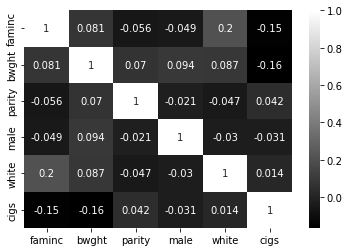

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_data = data.corr()
sn.heatmap(corr_data, annot=True, cmap='gray')
plt.show()

#### Hypothesis test
Test statistically if coefficient on number of cigarettes in the model with birth order equals 3.
$$
\begin{gather}
H_{0}: \beta_{4} = 0 \\
H_{1}: \beta_{4} \neq 0 \\
\\
t = \frac {-0.583 - 3}{ 0.108} = -33.17 \\
df = n - k - 1 = 1187 \\
p(>|{t}|) << .0001 
\end{gather}
$$

Assuming the null hypothesis ($\beta_{4} = 0$), is true, seeing a test statistic more than extreme
-33.17 is unlikely (<< .0001). Thus is unlikely ($\beta_{4} = 0$). It follows that it is likely that
$\beta_{4} \neq 0$, that is, an increase in cigarettes smoked by 1, will not increase baby weight by 3
ounces.


In [7]:
data = pd.read_csv('hprice1_mod.csv')
results = smf.ols('price ~ sqrft + bdrms', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     72.96
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           3.57e-19
Time:                        19:17:33   Log-Likelihood:                -488.00
No. Observations:                  88   AIC:                             982.0
Df Residuals:                      85   BIC:                             989.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.3150     31.047     -0.622      0.5

#### Regression with $\theta$
Increase in price assuming bedrooms increase by 3 and square feet increase by 200:
Price increase = .128(200) + 15.198(3) = 71.275 = $71,275
#### 95% Confidence Interval

$$
\begin{gather}
H_{0}: SE(200\hat{\beta}_{1} + 3\hat{\beta}_{2}) = 0 \\
200\hat{\beta}_{1} + 3\hat{\beta}_{2} = \theta \implies \hat{\beta}_{2} = \frac{\theta - 200\hat{\beta}_{1}}{3}
\end{gather}
$$

$$
\begin{align}
Price &= \beta_{0} + \beta_{1}SQ + \beta_{2}BR \\
&= \beta_{0} + \beta_{1}SQ + \left(\frac{\theta - 200\hat{\beta}_{1}}{3}\right)BR \\
&= \beta_{0} + \beta_{1}SQ + \frac{\theta BR}{3} - \frac{200\hat{\beta}_{1} BR}{3} \\
&= \beta_{0} + \frac{\theta BR}{3} + \beta_{1}\left(SQ - \frac{200BR}{3}\right)

\end{align}
$$


In [8]:
data['col1'] = data['sqrft'] - (200*data['bdrms'])/3
data['col2'] = data['bdrms']/3
results = smf.ols('price ~ col1 + col2', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     72.96
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           3.57e-19
Time:                        19:17:33   Log-Likelihood:                -488.00
No. Observations:                  88   AIC:                             982.0
Df Residuals:                      85   BIC:                             989.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.3150     31.047     -0.622      0.5

#### Interpretation

Price is regressed on $\frac{BR}{3}$ and $SQ - \frac{200BR}{3}$. The 95% confidence interval for the increase in house price given
an increase in 3 bedrooms and 200 square-feet is [17.434, 125.129] or between 17,434 dollars
and 125,129 dollars. Out of 100 random confidence intervals, 100 out of 95 of those intervals would contain
the true population parameter for the increase in home price given an increase in
bedrooms of 3 and an increase of square footage by 200.

#### Restricted F-test

$$
\begin{gather}
H_{0}: \beta_{2} = 0 \\
H_{1}: \beta_{2} \neq 0 \\

\\


\textrm{Unrestriced model: } Price = \beta_{0} + \beta_{1}SQ + \beta_{2}BR + \epsilon \\
\textrm{Restriced model: }  Price = \beta_{0} + \beta_{1}SQ + \epsilon \\

\end{gather}
$$



In [9]:
data = pd.read_csv('hprice1_mod.csv')
unrestricted = smf.ols('price ~ sqrft + bdrms', data=data).fit()
restricted = smf.ols('price ~ sqrft', data=data).fit()


print(f'Unrestriced: {unrestricted.rsquared}')
print(f'Restriced: {restricted.rsquared}')

Unrestriced: 0.6319184012190724
Restriced: 0.6207967283897788


$$
\begin{align}
F &= \frac{(R^2_{ur} - R^2_r) / q}{(1 - R^2_{ur}) / (n - k - 1)} \\
&= \frac{(0.632 - 0.621) / q}{(1 - 0.632) / (n - k - 1)} = 2.568\\
\\
&P(>F) = 0.1127 \\

\end{align}
$$

Assuming is true $\beta_2 = 0$, the probability of getting an F-statistic as extreme or more
extreme than 2.568 is likely (1 in 9). Thus $\beta_2 = 0$ is likey. It follows that $\beta_2 = 0$ is
unlikey, and it is unlikely that the number of bedrooms affects the price of houses.

In [11]:
data = pd.read_csv('bwght_mod.csv')
avg_cigs = round(data['cigs'].mean(),1)
results = smf.ols('bwght ~ cigs + white', data=data).fit()
print(f'Average cigarettes smoked: {avg_cigs} ')
print(results.summary())

Average cigarettes smoked: 1.8 
                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     21.61
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           6.06e-10
Time:                        19:19:29   Log-Likelihood:                -5248.6
No. Observations:                1192   AIC:                         1.050e+04
Df Residuals:                    1189   BIC:                         1.052e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.421

## Average baby weight
Computing average baby weight for white and non-white groups assuming each group smokes the average number of cigarettes smoked (1.8):
### White Groups
#### Average
$$
\begin{align}
E(BW|W=1) &= E(\beta_0 + \beta_1 av.cigs + \beta_2 white) \\
&= E(\beta_0) + E(\beta_1 av.cigs) + (\beta_2 white) \\
&= \beta_0 + \beta_1 av.cigs + \beta_2 white \\
&= 116.42 - 0.62(1.8) + 4.98 \\
&= 120.28

\end{align}
$$

#### 95% Confidence interval for white groups

$$
\begin{gather}
\theta = \beta_0 + \beta_1 av.cigs + \beta_2 white + \epsilon \implies \beta_0 = \theta - \beta_1 av.cigs + \beta_2 white + \epsilon \\
(\theta - \beta_1 av.cigs \beta_2 white) + \beta_1 cigs + \beta_2 + \epsilon \\
\theta + \beta_1 (cigs - av.cigs) + \beta_2 (white - 1) + \epsilon

\end{gather}
$$

In [ ]:
#Regressing baby weight on [cigs - 1.8] and [white - 1]:
data['col1'] = data['cigs'] - 1.8
data['col2'] = data['white'] - 1
results = smf.ols('bwght ~ col1 + col2', data=data).fit()
print(results.summary())

#### CI (95%) = [119.05, 121.50]

### Non-white groups
#### Average
$$
\begin{align}
E(BW|W=0) &= E(\beta_0 + \beta_1 av.cigs) \\
&= E(\beta_0) + E(\beta_1 av.cigs) \\
&= \beta_0 + \beta_1 av.cigs \\
&= 116.42 - 0.62(1.8) \\
&= 115.30

\end{align}
$$

#### 95% Confidence interval for non-white groups

$$
\begin{gather}
\theta = \beta_0 + \beta_1 av.cigs + \epsilon \implies \beta_0 = \theta - \beta_1 av.cigs + \epsilon \\
(\theta - \beta_1 av.cigs) + \beta_1 cigs + \beta_2 + \epsilon \\

\theta + \beta_1 (cigs - av.cigs) + \beta_2 white + \epsilon

\end{gather}
$$



In [ ]:
results = smf.ols('bwght ~ col1 + white', data=data).fit()
print(results.summary())

#### CI (95%) = [112.45, 118.15]

#### Algorithm

#### Hypothesis test - difference in birth weight between groups
$$
\begin{gather}

Test: (BW|W=1) = (BW|W=0) \\
H_0: \beta_0 + \beta_1 av.cigs + \beta_2 white = \beta_0 + \beta_1 av.cigs \implies \beta_2 = 0 \\
H_1: \beta_2 \neq 0

\end{gather}
$$

The original regression table shows a p-value for $\beta_2$ (white) of 0.002. This implies that assuming
the null hypothesis is true ($\beta_2=0$), seeing a test statistic (t) more than extreme 3.15 is unlikely (1
in 500). Thus it is unlikely that $\beta_2=0$ . It follows that it is likely that $\beta_2 \neq 0$, that is, birthweight is
impacted by whether the baby is white or non-white.


### Monte Carlo
You roll two four-sided dice and earn the sum of outcomes plus 3.
#### Expected Earnings

$$
\begin{gather}
&X = \textrm{outcome of first roll} \\
&Y = \textrm{outcome of second roll} \\
&E(X) = E(Y) = \frac{1}{4}\sum_{i=1}^{n=4} = 2.5 \\
\end{gather}
$$

$$
\begin{alignat*}{2}
E(W) &= E(X + Y + 3) &\quad &\textrm{given} \\
&=E(X) +E(Y) + E(3)  &\quad &E(a_{1}X_{1} + \cdots a_{n}X_{n}) = a_{1}E(X_{1})+ \cdots a_{n}E(X_{n})\\
&=2.5 + 2.5 + 3      &\quad &E(c) = c\\
&=8     &\quad &\textrm{addition}\\

\end{alignat*}
$$


In [ ]:
from numpy import random
theory = 8

def roll_two_dice():
    s = [1, 2, 3, 4]
    X = random.choice(s)
    Y = random.choice(s)
    return X + Y + 3

payouts = [roll_two_dice() for _ in range(10000)]

print(sum(payouts) / len(payouts))


### Monte Carlo
You roll three five-sided dice and earn the sum of outcomes minus 3.
#### Variance of Earnings


$$
\begin{gather}
&X = \textrm{outcome of first roll} \\
&Y = \textrm{outcome of second roll} \\
&Z = \textrm{outcome of third roll} \\
&E(X) = E(Y) = E(Z) = \frac{1}{5}\sum_{i=1}^{n=5} = 3 \\
&Var(X) = Var(Y) = Var(Z) = \frac{1}{5}\sum_{i=1}^{n=5}\left(X_{i} - E(X))^2\right) = 2
\end{gather}
$$

$$
\begin{alignat*}{2}
Var(W) &= Var(X + Y + Z - 3)    &\quad &\textrm{given} \\
&=Var(X) +Var(Y) + Var(Z) - 0   &\quad &\textrm{independence}\implies Var(a_{1}X_{1} + \cdots a_{n}X_{n}) = a^{2}_{1}Var(X_{1})+ \cdots a^{2}_{1}Var(X_{n})\\
&=2 + 2 + 2                     &\quad &\textrm{calculated}\\
&=6                             &\quad &\textrm{addition}\\

\end{alignat*}
$$


In [ ]:
theory = 6

def roll_three_dice():
    s = [1, 2, 3, 4, 5]
    X = random.choice(s)
    Y = random.choice(s)
    Z = random.choice(s)
    return X + Y + Z - 3

payouts = [roll_three_dice() for _ in range(10000)]

E = sum(payouts) / len(payouts)
Var = sum((i - E) ** 2 for _ in payouts) / len(payouts)

print(Var)